# Assignment 3
The objective of this assignment is to get you familiarize with `AutoEncoders`.

## Instructions
- Run this notebook on ```Google Colab(preferable)```
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells. 

## Note
- Code snippets are in ``Pytorch``. If you are comfortable with ``Keras`` feel free to use it. No restrictions on the frameworks

## Datasets 
- CIFAR10

## Packages Used
- Pytorch 
- Refer this link to get familiarity with pytorch and CIFAR10 dataset[link](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment3_Q2.ipynb`.

## Question 2 : Autoencoders


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

### Load CIFAR 10 Dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Train Data shape:", trainset.data.shape)
print("Test Data shape:", testset.data.shape)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train Data shape: (50000, 32, 32, 3)
Test Data shape: (10000, 32, 32, 3)


### Visualize the Data

torch.Size([16, 3, 32, 32])
torch.Size([16])


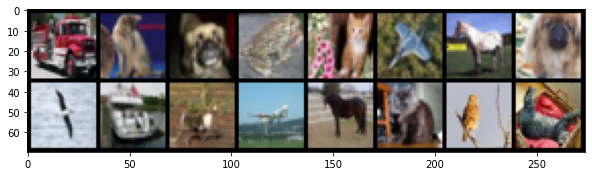

In [3]:
def imshow(img):
    img = img #/ 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(10,10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))

### Define Model
Refer ``` torch.nn ``` [link](https://pytorch.org/docs/stable/nn.html) 

Experiment with different architectures of encoder and decoder i.e
- encoder and decoder is fully connected layers
- encoder and decoder is combination of convolution layers + fully connected layers
- encoder and decoder is fully convolutional layers.

In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Input size: [batch, 3, 32, 32]
        # Output size: [batch, 3, 32, 32]
        self.encoder = nn.Sequential(
            # Write your code here
            nn.Conv2d(3, 12, 4, stride=2, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            # Write your code here
            nn.ConvTranspose2d(12, 3, 4, stride=2, padding=1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded


In [5]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Conv2DTranspose

In [6]:
def encode(y):
  y_final = []
  for i in y:
    tmp = np.zeros(10)
    tmp[i] = 1
    y_final.append(tmp)
  return np.array(y_final)

In [7]:
x_train = trainset.data
#y_train = encode(trainset.targets)
x_test = testset.data
#y_test = encode(testset.targets)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = np.copy(x_train)
#y_train = y_train.reshape(50000, 3072)
y_test = np.copy(x_test)
#y_test = y_test.reshape(10000, 3072)

In [8]:
#Fully connected Layers
model_fully_connected = keras.Sequential([
                                          Flatten(),
                                          layers.Dense(units=32*32*3,activation='relu'),
                                          layers.Dense(units=32*32,activation='relu'),
                                          #layers.Dense(units=32*16,activation='relu'),
                                          # layers.Dense(units=32*8,activation='relu'),
                                          # layers.Dense(units=32*4,activation='relu'),
                                          # layers.Dense(units=32*2,activation='relu'),
                                          # layers.Dense(units=32,activation='relu'),
                                          # layers.Dense(units=32*2,activation='relu'),
                                          # layers.Dense(units=32*4,activation='relu'),
                                          # layers.Dense(units=32*8,activation='relu'),
                                          layers.Dense(units=32*16,activation='relu'),
                                          layers.Dense(units=32*32,activation='relu'),
                                          layers.Dense(units=32*32*3,activation='softmax'),
                                          layers.Reshape((32,32,3))
])


In [35]:
#Convolution and Connected Layers
model_cnn_and_connected = keras.Sequential(
    [
     #Encoding
     Conv2D(4,3,activation='relu'),
     Conv2D(4,3,activation='relu'),
     Conv2D(4,3,activation='relu'),
     Conv2D(4,3,activation='relu'),
     #MaxPool2D(2,2), #Pooling layer,
     Flatten(),
     #layers.Dense(units=24*24*4,activation='relu'),
     #layers.Dense(units=24*24*2,activation='relu'),
     #layers.Dense(units=24*24,activation='relu'),
     #Decoding
     #layers.Dense(units=24*24*2,activation='relu'),
     layers.Dense(units=24*24*4,activation='relu'),
     layers.Dense(units=32*32*3, activation='softmax'),
     layers.Reshape((32,32,3)),
     ]
)


In [11]:
#Convolution Only
model_cnn = keras.Sequential(
    [
     #Encoding
     layers.Input(shape=(32, 32, 3)),
     Conv2D(16,3,activation='relu',padding='same'),
     Conv2D(8,3,activation='relu',padding='same'),
     #Conv2D(4,3,activation='relu',padding='same'),
     #Conv2D(2,3,activation='relu',padding='same'),
     #MaxPool2D(2,2), #Pooling layer,
     #Flatten(),
     #Decoding
     #Conv2DTranspose(2,3,activation='relu',padding='same'),
     #Conv2DTranspose(4,3,activation='relu',padding='same'),
     Conv2DTranspose(8,3,activation='relu',padding='same'),
     Conv2DTranspose(16,3,activation='relu',padding='same'),
     Conv2D(3,3,activation='sigmoid',padding='same'),
     layers.Reshape((32,32,3)),
     ]
)


In [12]:
def print_model(encoder, decoder):
    print("############## Encoder ##############")
    print(encoder)
    print("############## Decoder ##############")
    print(decoder)
    print("")

def create_model():
  autoencoder = Autoencoder()
  print_model(autoencoder.encoder, autoencoder.decoder)
  return autoencoder

### Loss and Optimizer

In [13]:
autoencoder = create_model()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters())

#Fully Connected Layers
model_fully_connected.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics="accuracy"
)

#CNN and Connected layers
model_cnn_and_connected.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics="accuracy"
)

#CNN only
model_cnn.compile(
    optimizer="rmsprop",
    loss="mse",
    metrics="accuracy"
)

############## Encoder ##############
Sequential(
  (0): Conv2d(3, 12, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): ReLU()
)
############## Decoder ##############
Sequential(
  (0): ConvTranspose2d(12, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
  (1): Sigmoid()
)



### Training

In [14]:
for epoch in range(10):
	running_loss = 0.0
	for i, (inputs, _) in enumerate(trainloader, 0):
			inputs = Variable(inputs)
	
			# ============ Forward ============
			encoded, outputs = autoencoder(inputs)
			loss = criterion(outputs, inputs)
			# ============ Backward ============
			optimizer.zero_grad()
			loss.backward()
			optimizer.step()
	
			# ============ Logging ============
			running_loss += loss.data
			if i % 2000 == 1999:
				print('[%d, %5d] loss: %.3f' %
					(epoch + 1, i + 1, running_loss / 2000))
				running_loss = 0.0
torch.save(autoencoder.state_dict(), "autoencoder.pt")


#Fully Connected Layers
h_fully_connected = model_fully_connected.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=512,
    epochs=10,
#    callbacks=[early_stopping],
)

#CNN and Connected layers
h_cnn_and_connected = model_cnn_and_connected.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=10,
#    callbacks=[early_stopping],
)

#CNN only
h_cnn = model_cnn.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=256,
    epochs=10,
#    callbacks=[early_stopping],
)

print('Finished Training')
print('Saving Model...')
model_fully_connected.save("Fully_connected")
model_cnn_and_connected.save("CNN_and_Connected")
model_cnn.save("CNN")

[1,  2000] loss: 0.007
[2,  2000] loss: 0.001
[3,  2000] loss: 0.001
[4,  2000] loss: 0.001
[5,  2000] loss: 0.001
[6,  2000] loss: 0.001
[7,  2000] loss: 0.001
[8,  2000] loss: 0.001
[9,  2000] loss: 0.001
[10,  2000] loss: 0.001
Epoch 1/10
98/98 [==============================] - 100s 1s/step - loss: 0.2870 - accuracy: 0.3753 - val_loss: 0.2899 - val_accuracy: 0.3913
Epoch 2/10
98/98 [==============================] - 98s 1s/step - loss: 0.2870 - accuracy: 0.3978 - val_loss: 0.2899 - val_accuracy: 0.4117
Epoch 3/10
98/98 [==============================] - 98s 1s/step - loss: 0.2870 - accuracy: 0.4180 - val_loss: 0.2898 - val_accuracy: 0.4206
Epoch 4/10
98/98 [==============================] - 98s 1s/step - loss: 0.2869 - accuracy: 0.4246 - val_loss: 0.2898 - val_accuracy: 0.4241
Epoch 5/10
98/98 [==============================] - 98s 1s/step - loss: 0.2869 - accuracy: 0.4274 - val_loss: 0.2898 - val_accuracy: 0.4229
Epoch 6/10
98/98 [==============================] - 98s 1s/step - lo

### Load the saved model and Reconstruct the image

In [15]:
autoencoder.load_state_dict(torch.load("/content/autoencoder.pt"))

#Reconstruction
reconstructed_fully_connected = keras.models.load_model("Fully_connected")
reconstructed_cnn_connected = keras.models.load_model("CNN_and_Connected")
reconstructed_cnn = keras.models.load_model("CNN")

#### Provide Qualitative Results and Aanlysis with different encoder and decoder architectures as mentioned above.

GroundTruth:    cat  ship  ship plane  frog


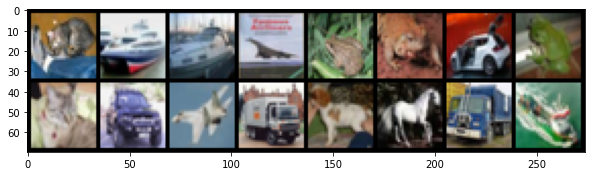

Reconstructed image


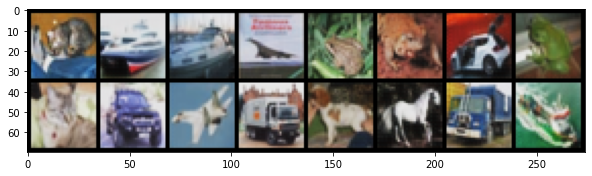

In [16]:
dataiter = iter(testloader)
images, labels = dataiter.next()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(5)))
imshow(torchvision.utils.make_grid(images))

images = Variable(images)

print("Reconstructed image")
decoded_imgs = autoencoder(images)[1]
imshow(torchvision.utils.make_grid(decoded_imgs.data))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

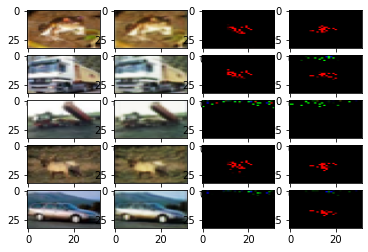

In [55]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 4)
cnn_img = reconstructed_cnn.predict((x_train[0:20]))
connected_img = (reconstructed_fully_connected.predict((x_train[0:20]))*255)
cnn_connected_img = reconstructed_cnn_connected.predict((x_train[0:20]))*255
for j in range(5):
  ax[j][0].imshow(x_train[j], aspect='auto') #Orginal
  ax[j][1].imshow(cnn_img[j], aspect='auto') #CNN only encode-decode
  ax[j][2].imshow(connected_img[j], aspect='auto') #Fully connected layers encode-decode
  ax[j][3].imshow(cnn_connected_img[j], aspect='auto') #CNN and Fully connected layers encode-decode

plt.show()

#### 2.1 What are the Applications of Autoencoders and different types of Autoencoders

Types:
Multilayer autoencoder
Convolutional autoencoder
Regularized autoencoder

Applications:
Dimensionality reduction
Image compression

####2.2 PCA versus Autoencoders. Give detailed differences between them. (can use equations in latex and figures for the justification).

PCA essentially learns a linear transformation that projects the data into another space, where vectors of projections are defined by variance of the data.
Autoencoders are neural networks that can be used to reduce the data into a low dimensional latent space by stacking multiple non-linear transformations(layers).
PCA is quicker and less expensive to compute than autoencoders. PCA is quite similar to a single layered autoencoder with a linear activation function. Because of the large number of parameters, the autoencoder is prone to overfitting.